In [169]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce
from numpy import percentile


filename = "data/" + "0"+ str(25) + '/'
        
measurements = pd.read_csv(filename+ "measurements.csv")
stations = pd.read_csv(filename+ "stations.csv")

measurements = pd.read_csv(filename+ "measurements.csv",sep ='\t')
stations = pd.read_csv(filename+ "stations.csv",sep ='\t')




<h2> Merge dát

In [170]:
stations.drop('QoS', inplace=True, axis=1)
stations.drop('revision', inplace=True, axis=1)
merged_df = pd.merge( measurements, stations, left_on=["longitude", "latitude"], right_on=["longitude", "latitude"])
merged_df.sort_values('PM10')

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
9687,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,Asia/Tokyo,JP
9688,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,Asia/Tokyo,JP
18605,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,America/New_York,US
18604,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,America/New_York,US
23758,1.92294,6.12330,0.0,42.49213,8.92464,18.74332,0.02261,56.03857,10.65109,8.45716,52.86147,1139.68250,9.59260,5.64244,6.94828,58.53332,10.98644,8.19369,Europe/Berlin,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24502,NaN,7.92027,1.0,56.36417,9.22568,8.87750,0.03296,29.52946,7.60894,8.20905,46.75451,1139.17859,33.34864,9.20933,5.88914,46.94777,7.69299,9.74332,Europe/Kiev,UA
24503,NaN,7.92027,1.0,56.36417,9.22568,8.87750,0.03296,29.52946,7.60894,8.20905,46.75451,1139.17859,33.34864,9.20933,5.88914,46.94777,7.69299,9.74332,Europe/Kiev,UA
24654,NaN,7.55891,1.0,55.44134,9.63176,5.57682,0.03027,52.67479,5.24887,5.75450,33.44872,1074.19602,-86.78777,7.72184,10.33559,45.18717,10.51719,6.85583,America/Chicago,US
24712,NaN,5.06021,1.0,63.90338,9.04240,NaN,0.02968,79.33649,6.58649,7.56180,43.61062,1177.71705,-72.97261,6.42209,6.94363,29.45282,6.14840,6.61491,America/New_York,US


<h2> Integrácia a čistenie dát

<h3> Enumeracia a čistenie hodnôt

In [171]:
merged_df = merged_df.drop_duplicates(keep='first')
merged_df

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087,Europe/Amsterdam,NL
1,9.19988,8.69691,0.0,36.08124,7.22592,-2.27734,0.13049,27.76991,11.34923,9.44371,52.26083,1127.37585,7.00417,9.42485,7.08347,47.39045,5.12461,7.48897,Europe/Amsterdam,NL
2,6.31859,6.23097,1.0,64.61840,9.56617,12.25127,0.02591,41.72744,NaN,8.26135,52.26083,1133.72497,7.00417,8.61704,7.77413,55.14021,5.48395,7.16817,Europe/Amsterdam,NL
3,12.07679,7.31197,0.0,69.76080,7.13670,30.22012,1.85071,69.69690,5.71201,9.38742,52.26083,1071.47119,7.00417,7.13162,7.56315,62.08844,8.60372,8.06096,Europe/Amsterdam,NL
4,9.93780,6.72407,0.0,46.01395,10.26269,0.02751,0.23759,46.81255,6.11025,7.44149,52.26083,1194.42875,7.00417,8.60356,7.76513,27.07563,5.33211,9.46192,Europe/Amsterdam,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,5.48659,8.08125,1.0,16.81344,8.90944,41.94482,0.02135,49.02013,5.65448,6.71573,36.60090,1082.61222,126.66500,9.77226,9.84302,37.80398,10.33177,8.71820,Asia/Seoul,KR
25075,8.35377,6.62863,0.0,61.04381,9.17051,15.11938,0.06572,55.55084,9.18283,6.04759,36.60090,1163.81194,126.66500,8.60282,7.11961,63.42805,7.05525,7.54919,Asia/Seoul,KR
25076,9.73372,8.51869,0.0,76.61218,7.79681,-0.94018,0.20473,28.74120,6.56890,8.00890,36.60090,1065.41843,126.66500,9.15373,7.70164,57.47791,8.77038,7.00583,Asia/Seoul,KR
25077,8.76141,8.31462,0.0,53.96995,6.91148,24.00254,0.09612,32.50681,7.37873,9.71030,36.60090,1072.08096,126.66500,7.40329,6.58851,49.09242,9.69961,8.44219,Asia/Seoul,KR


In [173]:
"""stations['QoS'] = stations['QoS'].str.replace('accep' , 'acceptable')
stations['QoS'] = stations['QoS'].str.replace('maitennce' , 'maintenance')

stations.QoS = pd.Categorical(stations.QoS)
stations['QoS'] = stations.QoS.cat.codes
stations"""

"stations['QoS'] = stations['QoS'].str.replace('accep' , 'acceptable')\nstations['QoS'] = stations['QoS'].str.replace('maitennce' , 'maintenance')\n\nstations.QoS = pd.Categorical(stations.QoS)\nstations['QoS'] = stations.QoS.cat.codes\nstations"

In [175]:
"""stations.code = pd.Categorical(stations.code)
stations['code'] = stations.code.cat.codes
stations"""

"stations.code = pd.Categorical(stations.code)\nstations['code'] = stations.code.cat.codes\nstations"

In [176]:
"""stations['revision'] = stations['revision'].str.replace(', 00:00:00' , '')
stations['revision'] = stations['revision'].str.replace('/' , '-')
stations['revision'] = stations['revision'].str.replace(' ' , '-')

stations['revision'] = stations['revision'].str.replace('Jan' , '01')
stations['revision'] = stations['revision'].str.replace('Feb' , '02')
stations['revision'] = stations['revision'].str.replace('Mar' , '03')
stations['revision'] = stations['revision'].str.replace('Apr' , '04')
stations['revision'] = stations['revision'].str.replace('May' , '05')
stations['revision'] = stations['revision'].str.replace('Jun' , '06')
stations['revision'] = stations['revision'].str.replace('Jul' , '07')
stations['revision'] = stations['revision'].str.replace('Aug' , '08')
stations['revision'] = stations['revision'].str.replace('Aug' , '09')
stations['revision'] = stations['revision'].str.replace('Oct' , '10')
stations['revision'] = stations['revision'].str.replace('Aug' , '11')
stations['revision'] = stations['revision'].str.replace('Dec' , '12')

stations['revision'] = stations['revision'].astype('datetime64')
stations['revision']
"""

"stations['revision'] = stations['revision'].str.replace(', 00:00:00' , '')\nstations['revision'] = stations['revision'].str.replace('/' , '-')\nstations['revision'] = stations['revision'].str.replace(' ' , '-')\n\nstations['revision'] = stations['revision'].str.replace('Jan' , '01')\nstations['revision'] = stations['revision'].str.replace('Feb' , '02')\nstations['revision'] = stations['revision'].str.replace('Mar' , '03')\nstations['revision'] = stations['revision'].str.replace('Apr' , '04')\nstations['revision'] = stations['revision'].str.replace('May' , '05')\nstations['revision'] = stations['revision'].str.replace('Jun' , '06')\nstations['revision'] = stations['revision'].str.replace('Jul' , '07')\nstations['revision'] = stations['revision'].str.replace('Aug' , '08')\nstations['revision'] = stations['revision'].str.replace('Aug' , '09')\nstations['revision'] = stations['revision'].str.replace('Oct' , '10')\nstations['revision'] = stations['revision'].str.replace('Aug' , '11')\nstat

<h3> Chýbajúce hodnoty

<AxesSubplot: >

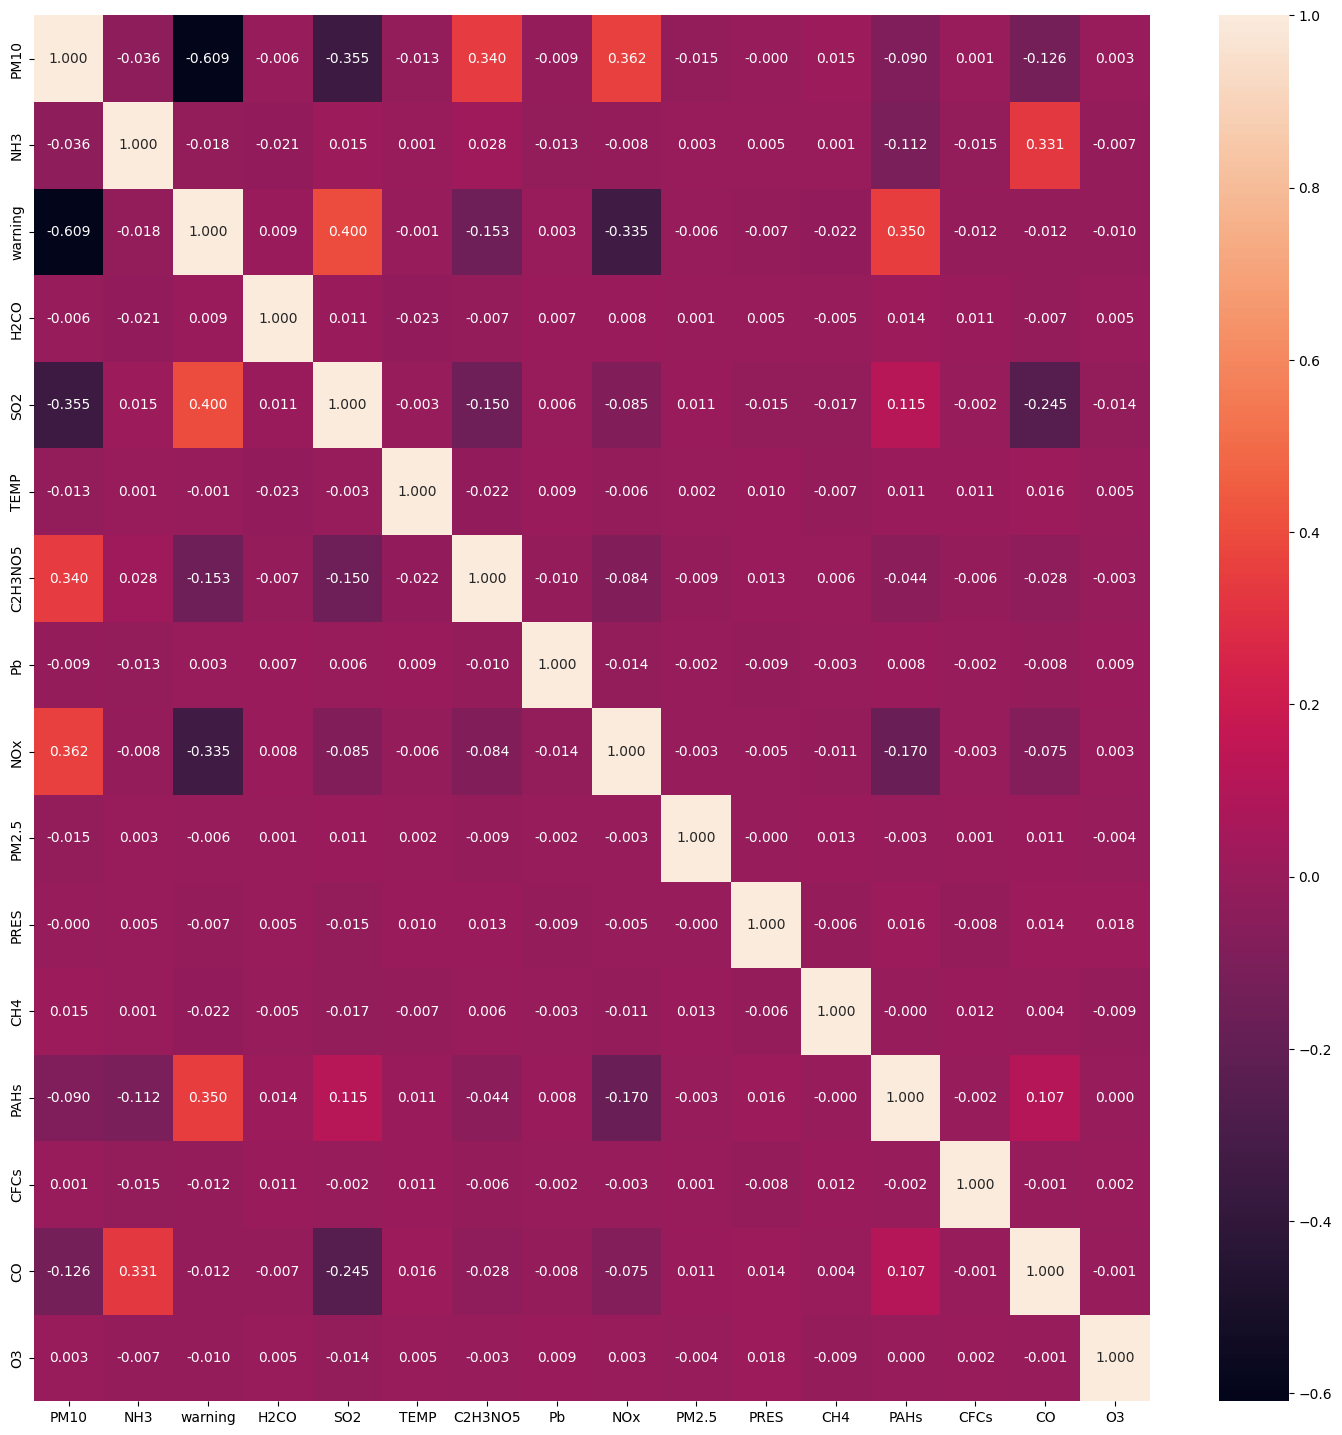

In [150]:
df_helper = measurements.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

1. spôsob - odstranenie riadky s Nan

In [131]:
df_notNaN = measurements.dropna()
df_notNaN

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087
1,9.00509,8.44381,0.0,55.41733,7.13753,3.92586,0.10191,42.63640,11.34799,8.11740,39.43534,1108.24878,-84.20299,7.42952,5.99743,54.64957,6.76763,9.01290
2,10.15744,4.59693,0.0,63.30345,6.27562,1.85796,0.27831,67.70390,5.44044,8.32536,48.52961,1110.66223,12.16179,7.95468,6.81140,57.81200,8.49049,9.30919
3,6.44879,6.24834,1.0,21.91017,7.57754,17.08684,0.02904,25.35154,6.38345,8.00394,41.00510,1135.61679,-73.78458,7.23988,6.85945,43.24279,6.44554,6.80424
5,6.39260,6.39405,0.0,48.35797,8.51784,28.38312,0.03878,34.43857,7.81019,8.47575,41.84364,1120.38943,-87.71255,7.36852,6.04381,24.14129,9.42178,7.92892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,6.98324,3.96101,1.0,35.45242,7.77484,15.36379,0.03206,26.39865,5.88455,8.62439,49.41029,1059.07318,38.15035,8.04092,7.81041,30.05312,5.54049,7.15844
12097,6.26488,4.89993,1.0,78.17503,9.70239,1.85992,0.02565,63.52891,5.72752,10.91645,-3.14306,1096.86977,-58.44417,7.21943,9.95392,38.80755,7.78927,6.64297
12098,8.72420,9.15420,0.0,43.03497,7.20861,29.81891,0.08371,28.87521,7.21287,8.77967,43.83125,1124.29627,5.03586,9.34943,6.84354,34.43359,9.57857,6.10178
12099,7.89244,7.18884,0.0,57.25632,7.81167,13.32181,0.03518,36.20571,8.39126,7.28543,10.12268,1107.53766,77.54372,7.64544,6.60066,49.59714,10.21135,9.83768


<AxesSubplot: >

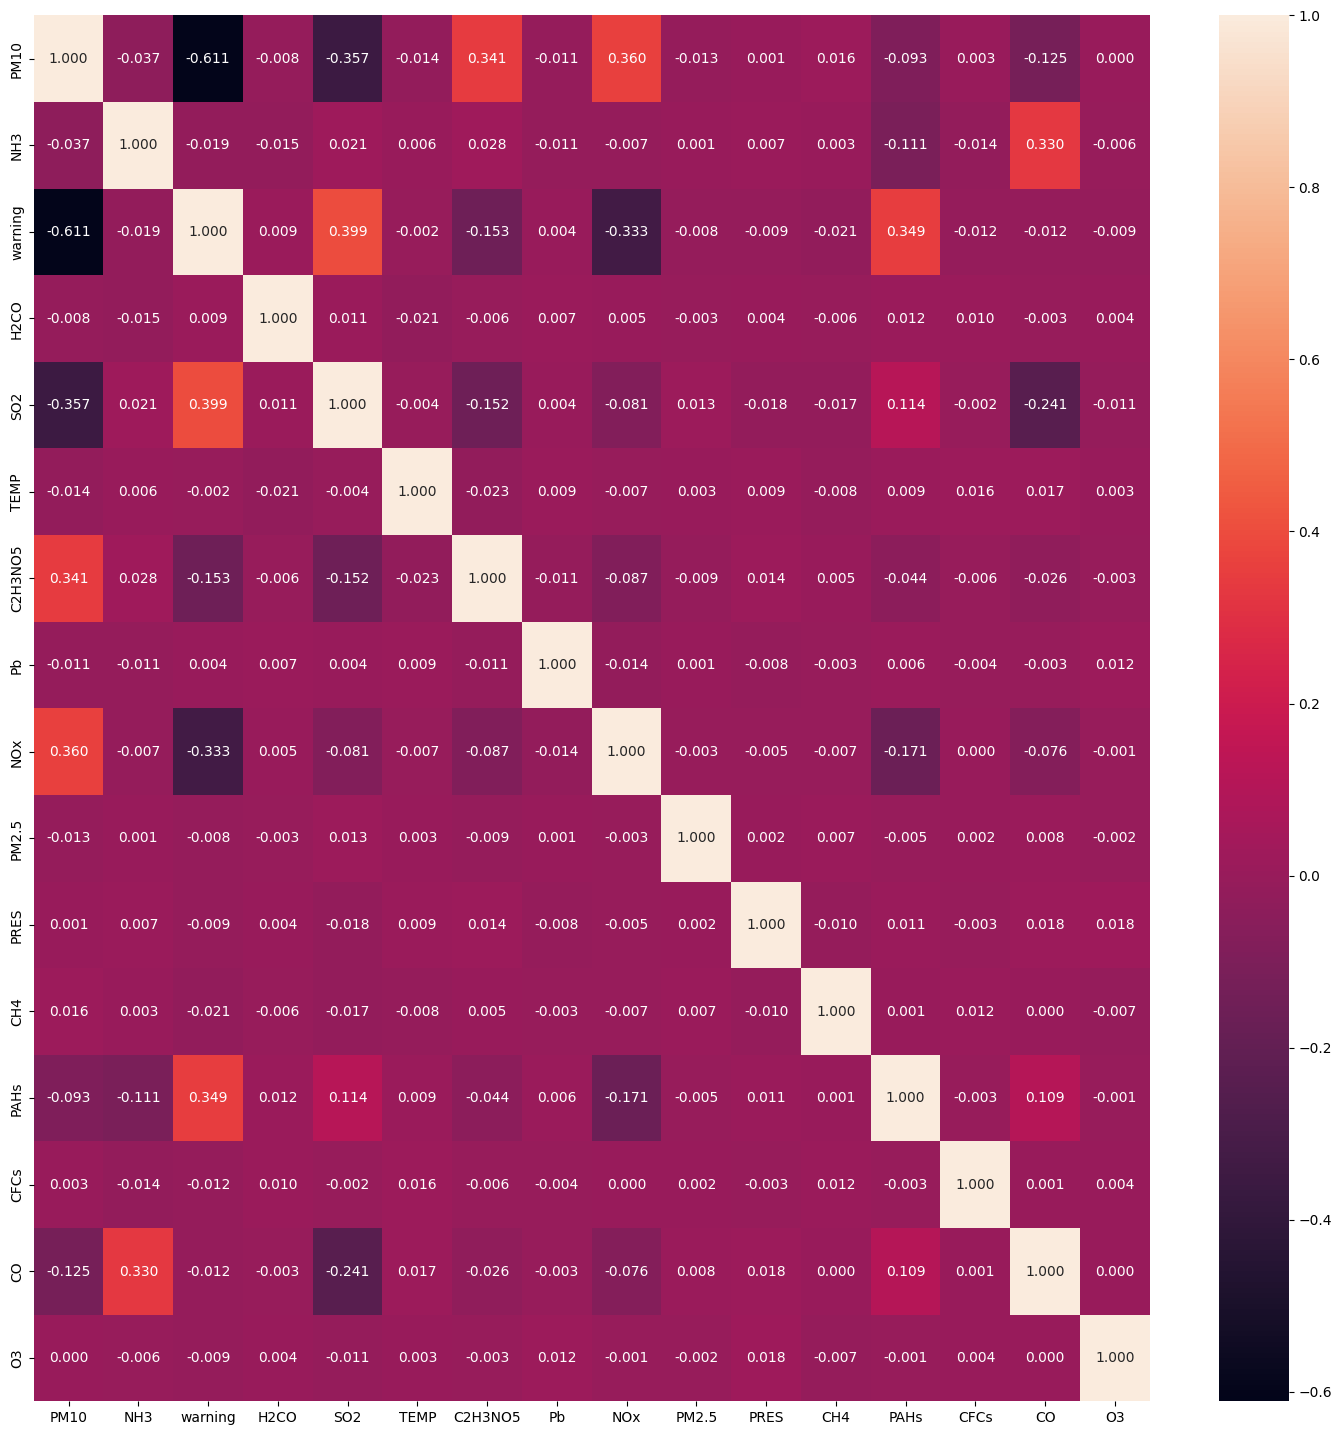

In [132]:
df_helper = df_notNaN.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

2. spôsob - nahradenie Nan hodnoty s mean stlpcov

In [133]:
df_median = measurements.copy()
for key, value in measurements.items():
     df_median[key] = measurements[key].fillna(measurements[key].median())
    

In [134]:
df_median

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.041670,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087
1,9.00509,8.44381,0.0,55.41733,7.13753,3.92586,0.101910,42.63640,11.34799,8.11740,39.43534,1108.24878,-84.20299,7.42952,5.99743,54.64957,6.76763,9.01290
2,10.15744,4.59693,0.0,63.30345,6.27562,1.85796,0.278310,67.70390,5.44044,8.32536,48.52961,1110.66223,12.16179,7.95468,6.81140,57.81200,8.49049,9.30919
3,6.44879,6.24834,1.0,21.91017,7.57754,17.08684,0.029040,25.35154,6.38345,8.00394,41.00510,1135.61679,-73.78458,7.23988,6.85945,43.24279,6.44554,6.80424
4,14.50236,8.13272,0.0,51.82537,4.81670,8.72152,0.041335,37.09306,3.06718,9.16570,61.78491,1076.99556,34.34691,8.58638,8.48867,42.50140,7.16875,7.94615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,6.98324,3.96101,1.0,35.45242,7.77484,15.36379,0.032060,26.39865,5.88455,8.62439,49.41029,1059.07318,38.15035,8.04092,7.81041,30.05312,5.54049,7.15844
12097,6.26488,4.89993,1.0,78.17503,9.70239,1.85992,0.025650,63.52891,5.72752,10.91645,-3.14306,1096.86977,-58.44417,7.21943,9.95392,38.80755,7.78927,6.64297
12098,8.72420,9.15420,0.0,43.03497,7.20861,29.81891,0.083710,28.87521,7.21287,8.77967,43.83125,1124.29627,5.03586,9.34943,6.84354,34.43359,9.57857,6.10178
12099,7.89244,7.18884,0.0,57.25632,7.81167,13.32181,0.035180,36.20571,8.39126,7.28543,10.12268,1107.53766,77.54372,7.64544,6.60066,49.59714,10.21135,9.83768


<AxesSubplot: >

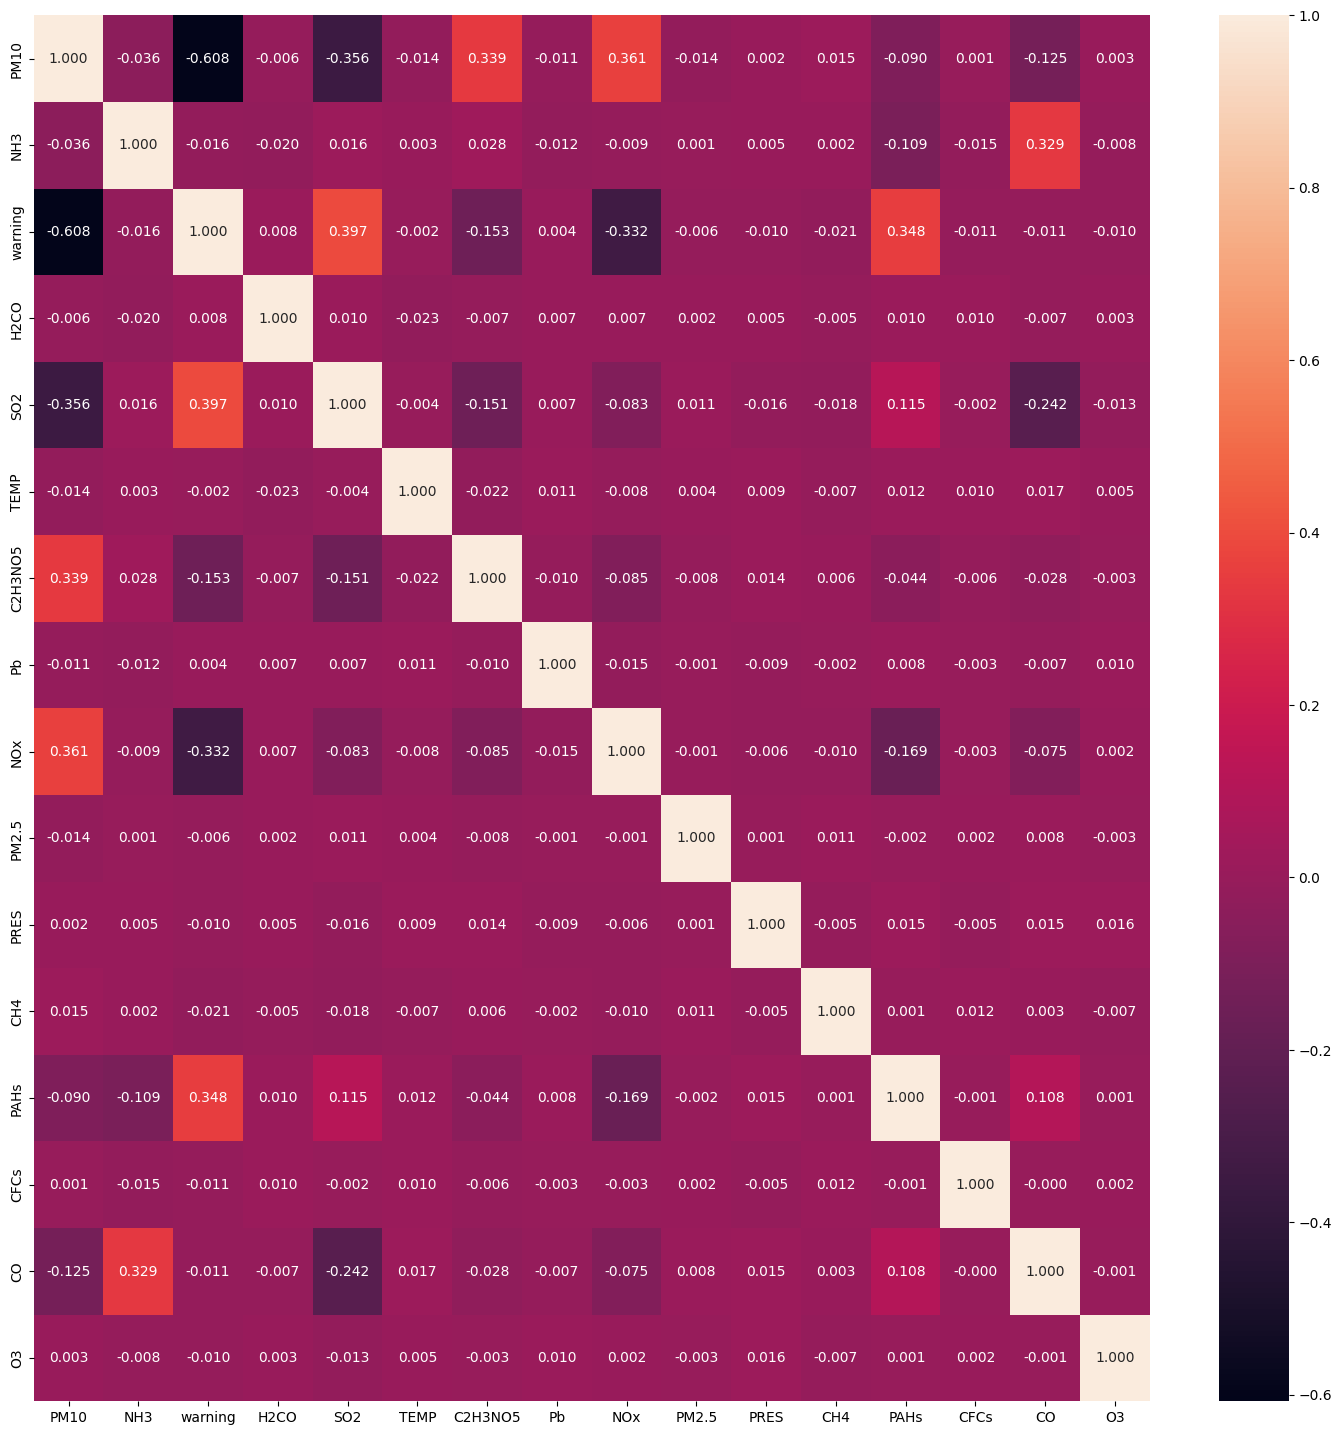

In [135]:
df_helper = df_median.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

<h2> Vychýlene hodnoty

<h3>Odstraňovanie pomocou Smerodajnej odchýlky

In [136]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 12100
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       11922 non-null  float64
 1   NH3        11922 non-null  float64
 2   warning    11922 non-null  float64
 3   H2CO       11922 non-null  float64
 4   SO2        11922 non-null  float64
 5   TEMP       11922 non-null  float64
 6   C2H3NO5    11922 non-null  float64
 7   Pb         11922 non-null  float64
 8   NOx        11922 non-null  float64
 9   PM2.5      11922 non-null  float64
 10  latitude   11922 non-null  float64
 11  PRES       11922 non-null  float64
 12  longitude  11922 non-null  float64
 13  CH4        11922 non-null  float64
 14  PAHs       11922 non-null  float64
 15  CFCs       11922 non-null  float64
 16  CO         11922 non-null  float64
 17  O3         11922 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [137]:
df_median_mean, df_median_std = df_median.mean(), df_median.std()

# define outliers
cut_off = df_median_std * 3
lower, upper = df_median_mean - cut_off, df_median_mean + cut_off 
# identify outliers


for key, value in measurements.items():
    if key == 'warning' or key == 'code' or key == 'location':
        continue
    df_median_std = df_median[(df_median[key] <= upper[key]) & (df_median[key] >= lower[key])]

df_median_std

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.041670,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087
1,9.00509,8.44381,0.0,55.41733,7.13753,3.92586,0.101910,42.63640,11.34799,8.11740,39.43534,1108.24878,-84.20299,7.42952,5.99743,54.64957,6.76763,9.01290
2,10.15744,4.59693,0.0,63.30345,6.27562,1.85796,0.278310,67.70390,5.44044,8.32536,48.52961,1110.66223,12.16179,7.95468,6.81140,57.81200,8.49049,9.30919
3,6.44879,6.24834,1.0,21.91017,7.57754,17.08684,0.029040,25.35154,6.38345,8.00394,41.00510,1135.61679,-73.78458,7.23988,6.85945,43.24279,6.44554,6.80424
4,14.50236,8.13272,0.0,51.82537,4.81670,8.72152,0.041335,37.09306,3.06718,9.16570,61.78491,1076.99556,34.34691,8.58638,8.48867,42.50140,7.16875,7.94615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,6.98324,3.96101,1.0,35.45242,7.77484,15.36379,0.032060,26.39865,5.88455,8.62439,49.41029,1059.07318,38.15035,8.04092,7.81041,30.05312,5.54049,7.15844
12097,6.26488,4.89993,1.0,78.17503,9.70239,1.85992,0.025650,63.52891,5.72752,10.91645,-3.14306,1096.86977,-58.44417,7.21943,9.95392,38.80755,7.78927,6.64297
12098,8.72420,9.15420,0.0,43.03497,7.20861,29.81891,0.083710,28.87521,7.21287,8.77967,43.83125,1124.29627,5.03586,9.34943,6.84354,34.43359,9.57857,6.10178
12099,7.89244,7.18884,0.0,57.25632,7.81167,13.32181,0.035180,36.20571,8.39126,7.28543,10.12268,1107.53766,77.54372,7.64544,6.60066,49.59714,10.21135,9.83768


<h3>Odstraňovanie pomocou Smerodajnej odchýlky


In [149]:
# calculate interquartile range
q25, q75 = df_median.quantile(.25, axis = 0), df_median.quantile(.75, axis = 0)
iqr = q75 - q25

q25, q75 = percentile(df_median['PM10'], 25), percentile(df_median['PM10'], 75)

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off


for key, value in measurements.items():
    if key == 'warning' or key == 'code' or key == 'location':
        continue
    df_median_iqr = df_median[(df_median[key] <= upper[key]) & (df_median[key] >= lower[key])]

df_median_iqr

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.041670,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087
1,9.00509,8.44381,0.0,55.41733,7.13753,3.92586,0.101910,42.63640,11.34799,8.11740,39.43534,1108.24878,-84.20299,7.42952,5.99743,54.64957,6.76763,9.01290
2,10.15744,4.59693,0.0,63.30345,6.27562,1.85796,0.278310,67.70390,5.44044,8.32536,48.52961,1110.66223,12.16179,7.95468,6.81140,57.81200,8.49049,9.30919
3,6.44879,6.24834,1.0,21.91017,7.57754,17.08684,0.029040,25.35154,6.38345,8.00394,41.00510,1135.61679,-73.78458,7.23988,6.85945,43.24279,6.44554,6.80424
4,14.50236,8.13272,0.0,51.82537,4.81670,8.72152,0.041335,37.09306,3.06718,9.16570,61.78491,1076.99556,34.34691,8.58638,8.48867,42.50140,7.16875,7.94615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,6.98324,3.96101,1.0,35.45242,7.77484,15.36379,0.032060,26.39865,5.88455,8.62439,49.41029,1059.07318,38.15035,8.04092,7.81041,30.05312,5.54049,7.15844
12097,6.26488,4.89993,1.0,78.17503,9.70239,1.85992,0.025650,63.52891,5.72752,10.91645,-3.14306,1096.86977,-58.44417,7.21943,9.95392,38.80755,7.78927,6.64297
12098,8.72420,9.15420,0.0,43.03497,7.20861,29.81891,0.083710,28.87521,7.21287,8.77967,43.83125,1124.29627,5.03586,9.34943,6.84354,34.43359,9.57857,6.10178
12099,7.89244,7.18884,0.0,57.25632,7.81167,13.32181,0.035180,36.20571,8.39126,7.28543,10.12268,1107.53766,77.54372,7.64544,6.60066,49.59714,10.21135,9.83768
